In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [3]:
df = pd.read_csv('./data/wine-clustering.csv')

In [29]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [94]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

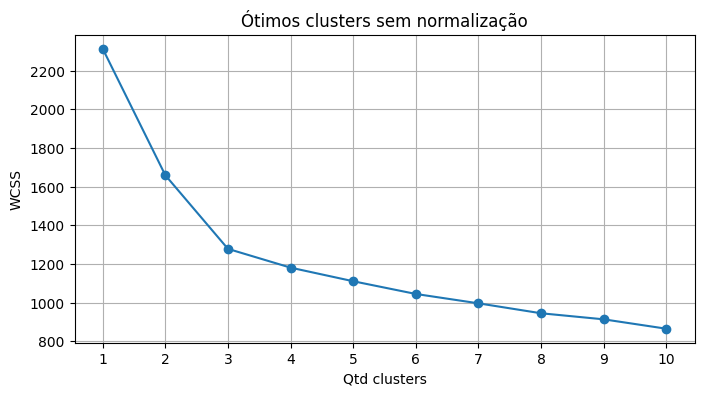

In [117]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Ótimos clusters sem normalização')
plt.xlabel('Qtd clusters')
plt.ylabel('WCSS')  
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [113]:
# Teste com 3 clusters sem normalização
kmeans_no_normalized = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
pred_y = kmeans_no_normalized.fit_predict(df)

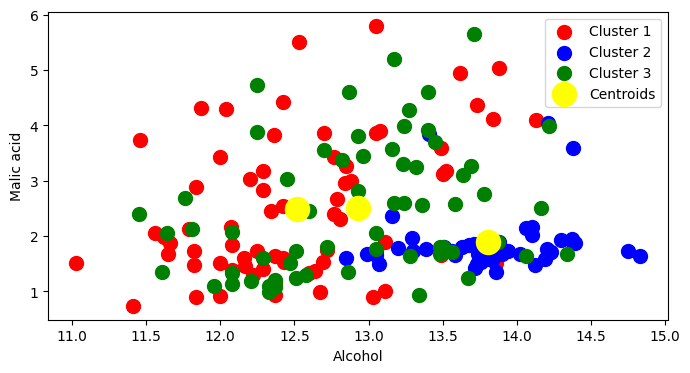

In [114]:
plt.figure(figsize=(8, 4))
plt.scatter(df.iloc[pred_y == 0, 0], df.iloc[pred_y == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(df.iloc[pred_y == 1, 0], df.iloc[pred_y == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(df.iloc[pred_y == 2, 0], df.iloc[pred_y == 2, 1], s=100, c='green', label='Cluster 3')

plt.scatter(kmeans_no_normalized.cluster_centers_[:, 0], kmeans_no_normalized.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.xlabel('Alcohol')
plt.ylabel('Malic acid')
plt.legend()
plt.show()

In [115]:
scaler = StandardScaler()
data_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(data=data_normalized)
print(df_normalized)

           0         1         2         3         4         5         6   \
0    1.518613 -0.562250  0.232053 -1.169593  1.913905  0.808997  1.034819   
1    0.246290 -0.499413 -0.827996 -2.490847  0.018145  0.568648  0.733629   
2    0.196879  0.021231  1.109334 -0.268738  0.088358  0.808997  1.215533   
3    1.691550 -0.346811  0.487926 -0.809251  0.930918  2.491446  1.466525   
4    0.295700  0.227694  1.840403  0.451946  1.281985  0.808997  0.663351   
..        ...       ...       ...       ...       ...       ...       ...   
173  0.876275  2.974543  0.305159  0.301803 -0.332922 -0.985614 -1.424900   
174  0.493343  1.412609  0.414820  1.052516  0.158572 -0.793334 -1.284344   
175  0.332758  1.744744 -0.389355  0.151661  1.422412 -1.129824 -1.344582   
176  0.209232  0.227694  0.012732  0.151661  1.422412 -1.033684 -1.354622   
177  1.395086  1.583165  1.365208  1.502943 -0.262708 -0.392751 -1.274305   

           7         8         9         10        11        12  
0   -0.65

In [116]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_normalized)
    wcss.append(kmeans.inertia_)

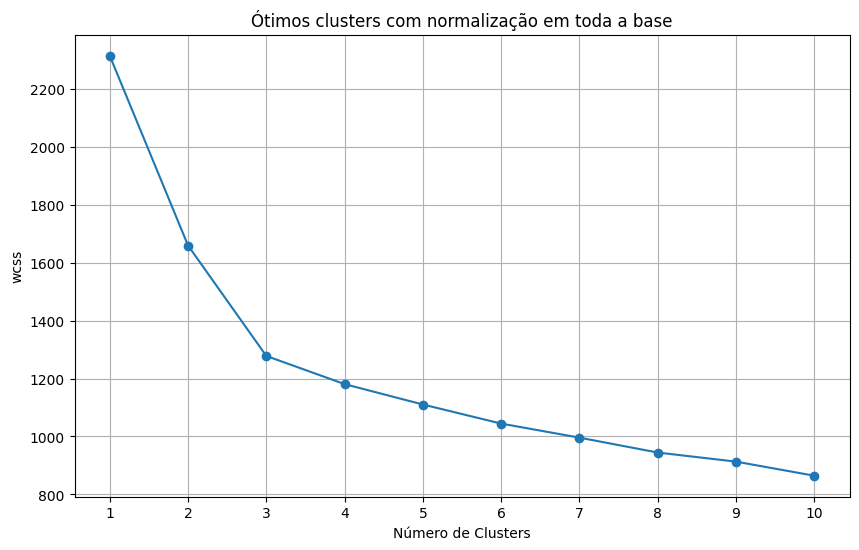

In [85]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Ótimos clusters com normalização em toda a base')

plt.xlabel('Número de Clusters')
plt.ylabel('wcss')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [121]:
# Teste com 3 clusters com base normalizada por completo
kmeans_normalized = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
pred_y = kmeans_normalized.fit_predict(df_normalized)

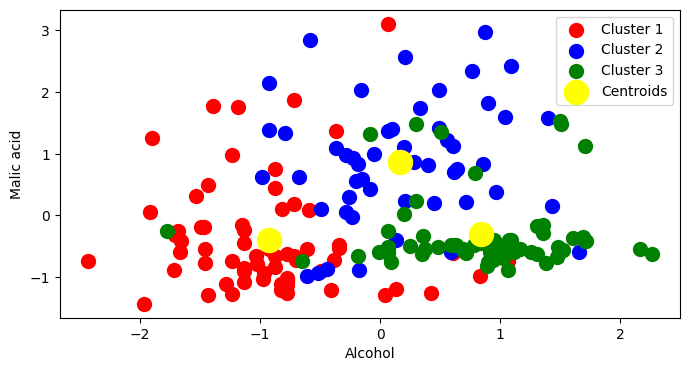

In [122]:
plt.figure(figsize=(8, 4))
plt.scatter(df_normalized.iloc[pred_y == 0, 0], df_normalized.iloc[pred_y == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(df_normalized.iloc[pred_y == 1, 0], df_normalized.iloc[pred_y == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(df_normalized.iloc[pred_y == 2, 0], df_normalized.iloc[pred_y == 2, 1], s=100, c='green', label='Cluster 3')

plt.scatter(kmeans_normalized.cluster_centers_[:, 0], kmeans_normalized.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.xlabel('Alcohol')
plt.ylabel('Malic acid')
plt.legend()
plt.show()

In [141]:
df['Cluster'] = kmeans_no_normalized.labels_ 
cluster_distribution = df['Cluster'].value_counts().sort_index()
cluster_distribution

Cluster
0    69
1    47
2    62
Name: count, dtype: int64

In [128]:
df_normalized['Cluster'] = kmeans_normalized.labels_ 
cluster_distribution = df_normalized['Cluster'].value_counts().sort_index()
cluster_distribution

Cluster
0    65
1    51
2    62
Name: count, dtype: int64

In [143]:
cluster_stats = df.groupby('Cluster')[['Alcohol', 'Malic_Acid']].describe()
cluster_stats

Alcohol                                                              \
          count       mean       std    min     25%     50%      75%    max   
Cluster                                                                       
0          69.0  12.516667  0.666996  11.03  12.070  12.420  12.8500  14.13   
1          47.0  13.804468  0.464331  12.85  13.535  13.820  14.1550  14.83   
2          62.0  12.929839  0.697101  11.45  12.370  13.005  13.4375  14.34   

        Malic_Acid                                                       
             count      mean       std   min    25%   50%     75%   max  
Cluster                                                                  
0             69.0  2.494203  1.262772  0.74  1.510  2.13  3.4300  5.80  
1             47.0  1.883404  0.547874  1.35  1.655  1.73  1.8800  4.04  
2             62.0  2.504032  1.184280  0.94  1.615  2.26  3.3525  5.65

In [144]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


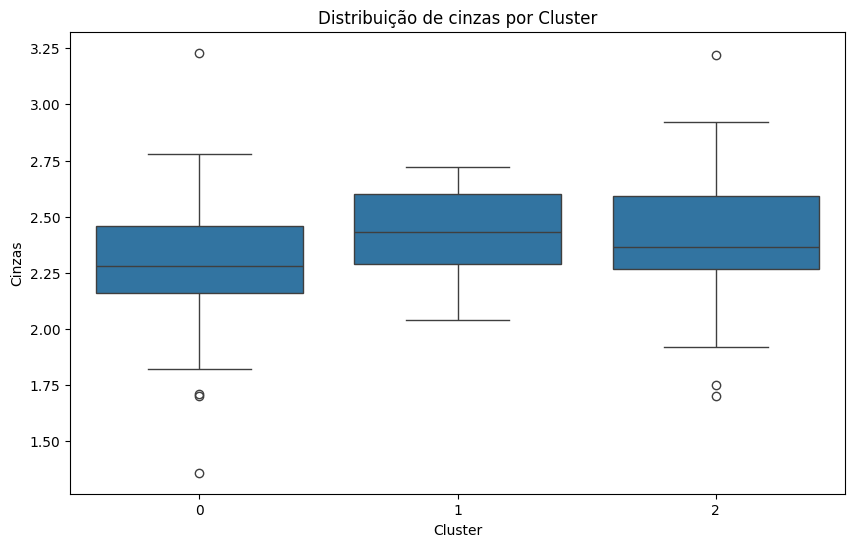

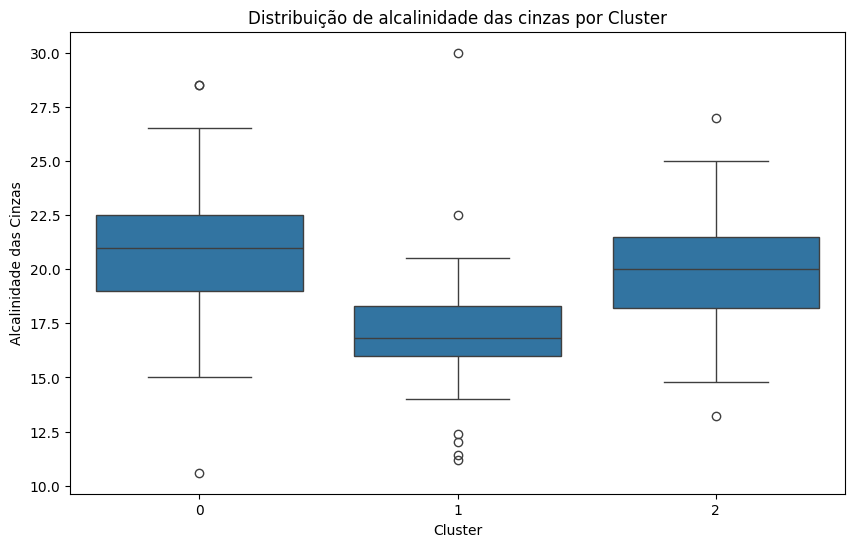

In [162]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Ash', data=df)
plt.title('Distribuição de cinzas por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Cinzas')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Ash_Alcanity', data=df)
plt.title('Distribuição de alcalinidade das cinzas por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Alcalinidade das Cinzas')
plt.show()

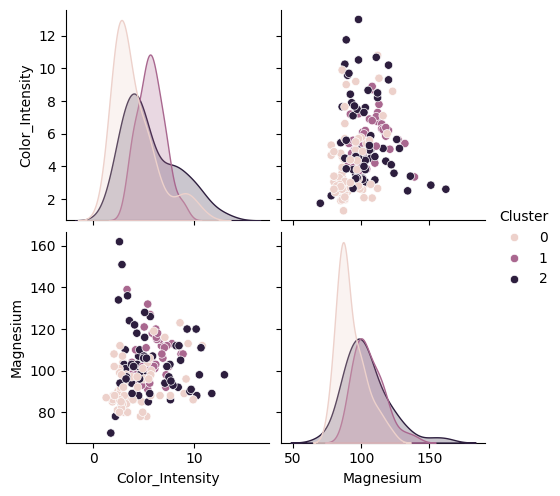

In [159]:
num_vars = ['Color_Intensity', 'Magnesium']
data_for_pairplot = df[num_vars + ['Cluster']]

sns.pairplot(data_for_pairplot, hue='Cluster')
plt.show()

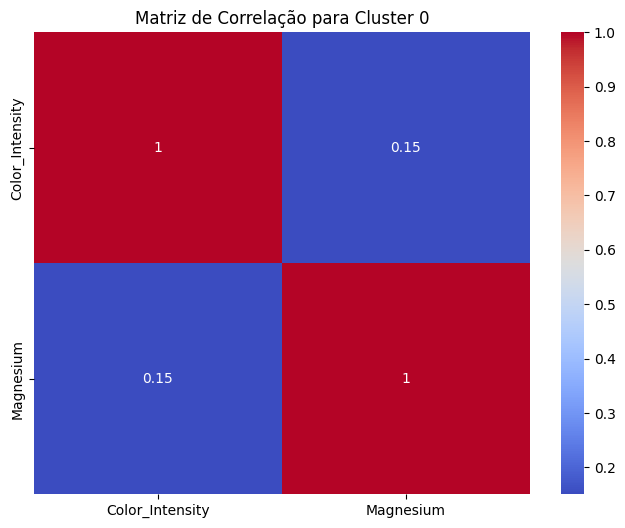

In [166]:
cluster_data = df[df['Cluster'] == 1]
corr_matrix = cluster_data[num_vars].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação para Cluster 0')
plt.show()

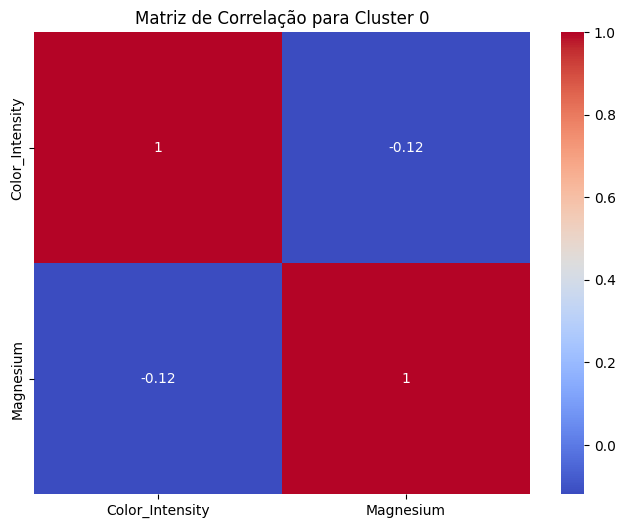

In [167]:
cluster_data = df[df['Cluster'] == 2]
corr_matrix = cluster_data[num_vars].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação para Cluster 0')
plt.show()

C:\Users\BuzzLitghtyear\AppData\Local\Temp\ipykernel_30624\3914468955.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Alcohol'], label=f'Cluster {cluster}', shade=True)
C:\Users\BuzzLitghtyear\AppData\Local\Temp\ipykernel_30624\3914468955.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Alcohol'], label=f'Cluster {cluster}', shade=True)
C:\Users\BuzzLitghtyear\AppData\Local\Temp\ipykernel_30624\3914468955.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Alcohol'], label=f'Cluster {cluster}', shade=True)


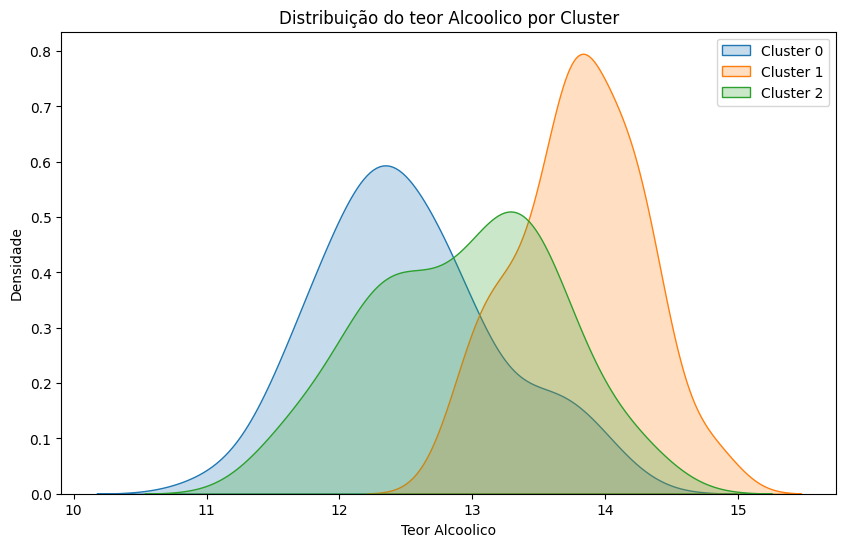

In [169]:
plt.figure(figsize=(10, 6))
for cluster in sorted(df['Cluster'].unique()):
    subset = df[df['Cluster'] == cluster]
    sns.kdeplot(subset['Alcohol'], label=f'Cluster {cluster}', shade=True)
plt.title('Distribuição do teor Alcoolico por Cluster')
plt.xlabel('Teor Alcoolico')
plt.ylabel('Densidade')
plt.legend()
plt.show()

In [179]:
cluster_3_data = df[df['Cluster'] == 2]
cluster_3_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0
mean,12.929839,2.504032,2.408065,19.890323,103.596774,2.111129,1.584032,0.388387,1.503387,5.650323,0.883968,2.365484,728.338710,2.0
std,0.697101,1.184280,0.280952,2.746247,16.607780,0.582496,0.960581,0.135902,0.584401,2.696876,0.229971,0.766090,94.832543,0.0
min,11.450000,0.940000,1.700000,13.200000,70.000000,1.100000,0.470000,0.130000,0.410000,1.740000,0.540000,1.270000,600.000000,2.0
25%,12.370000,1.615000,2.265000,18.200000,93.250000,1.657500,0.692500,0.282500,1.072500,3.535000,0.685000,1.687500,652.500000,2.0
50%,13.005000,2.260000,2.365000,20.000000,101.500000,1.965000,1.265000,0.390000,1.435000,4.800000,0.885000,2.280000,702.500000,2.0
75%,13.437500,3.352500,2.590000,21.500000,110.750000,2.600000,2.590000,0.495000,1.852500,7.637500,1.055000,3.115000,791.250000,2.0
max,14.340000,5.650000,3.220000,27.000000,162.000000,3.520000,3.750000,0.630000,3.280000,13.000000,1.310000,3.820000,937.000000,2.0


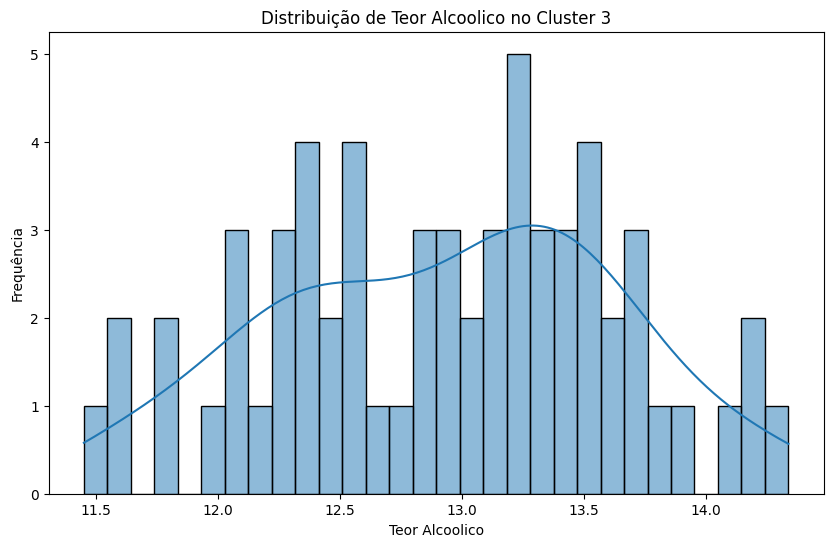

In [182]:
plt.figure(figsize=(10, 6))
sns.histplot(cluster_3_data['Alcohol'], bins=30, kde=True)
plt.title('Distribuição de Teor Alcoolico no Cluster 3')
plt.xlabel('Teor Alcoolico')
plt.ylabel('Frequência')
plt.show()